### Experiments

#### Import Libraries

In [1]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

/home/codespace/.python/current/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


#### Import Data

In [2]:
ETTm2 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTm2.csv")
training_df, test_df = split_dataset(ETTm2, remain_same = False)

#### Multivariate Case

#### Global Parameters

In [3]:
p_lag = 48
future_steps = 1
batch_size = 8
epochs = 1
learning_rate=1.e-4
decomp_kernel_size = 24
number_of_forecasts = 100
target_column = ['OT']
feature_columns = [i for i in training_df.columns]
modelling_task = 'univariate'

#### ETTm2

#### RLinear

In [4]:
net = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'rlinear', 
            modelling_task = modelling_task, 
            )

Random seed set as 42
Univatiate modelling
inflation factor = 1
Rlinear activated
Points to be estimated
Current learning rate is : 0.0001
---------------------------
Current (running) training loss at iteration 5000 : 15.877763270378113
Current (running) training loss at iteration 10000 : 13.535484302979707
Current (running) training loss at iteration 15000 : 10.686001931075255
Current (running) training loss at iteration 20000 : 8.995236542737484
Current (running) training loss at iteration 25000 : 7.828892739253044
Current (running) training loss at iteration 30000 : 6.922928733762105
Current (running) training loss at iteration 35000 : 6.151361016643899
Current (running) training loss at iteration 40000 : 5.483964066158235
Current (running) training loss at iteration 45000 : 4.941224199095534

Epoch 0: 

Train metrics: -------
Running (training) loss is 4.774620495210988.
Training MAE is 0.49635888087604774.
Training MSE is 4.774620493545467.
Training MAPE is 52360165.9345029.

Val

In [10]:
test_df.head(10)

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,day,month,hour,minute,weekday
46849,29.653999,0.0,37.769001,0.000,-8.561,-1.215,18.227501,1,11,0,15,2
46850,30.993999,0.0,39.537998,0.000,-7.282,-1.215,18.227501,1,11,0,30,2
46851,32.585999,0.0,40.825001,2.413,-8.476,-1.215,18.007999,1,11,0,45,2
46852,30.910000,0.0,39.618999,1.367,-8.476,-1.215,18.007999,1,11,1,0,2
46853,31.413000,0.0,40.691002,1.474,-8.476,-1.215,18.007999,1,11,1,15,2
46854,31.580999,0.0,40.289001,1.421,-8.476,-1.621,18.007999,1,11,1,30,2
46855,32.752998,0.0,40.852001,1.367,-6.983,-1.621,17.788000,1,11,1,45,2
46856,30.743000,0.0,38.118000,0.000,-6.962,-1.621,17.788000,1,11,2,0,2
46857,30.910000,0.0,40.931999,1.313,-9.553,-1.621,17.788000,1,11,2,15,2
46858,32.752998,0.0,40.209000,0.000,-6.877,-1.621,17.568001,1,11,2,30,2


tensor([[[ 27.2250,   0.0000,  36.9120,   0.0000,  -8.9660,  -2.4410,  31.1915]],

        [[ 27.2250,   0.0000,  37.3140,  -1.3400, -10.1820,  -2.4410,  31.8505]],

        [[ 26.4710,   0.0000,  36.3750,  -1.4210, -10.1820,  -2.4410,  32.5100]],

        [[ 27.8110,   0.0000,  36.9650,   0.0000,  -8.8600,  -2.4410,  33.1690]],

        [[ 28.3970,   0.0000,  37.4740,   0.0000,  -8.8600,  -2.4410,  33.8280]],

        [[ 29.5700,   0.0000,  37.7420,   0.0000,  -8.8600,  -1.6310,  34.4870]],

        [[ 26.3030,   0.0000,  34.7130,   0.0000,  -8.8600,  -1.6310,  34.9265]],

        [[ 22.2820,   0.0000,  32.0600,  -2.0100,  -8.8600,  -1.6310,  35.1465]]],
       dtype=torch.float64)
[print(tar) for tar in labels.squeeze(1,2).tolist()]
[27.22500038146973, 0.0, 36.9119987487793, 0.0, -8.965999603271484, -2.440999984741211, 31.19149971008301]
[27.22500038146973, 0.0, 37.31399917602539, -1.3400000333786009, -10.182000160217283, -2.440999984741211, 31.850500106811523]
[26.47100067138672, 0.

tensor([[[35.1830,  0.0000, 41.4420,  0.0000, -6.2580, -1.2790, 18.6670]],

        [[33.5070,  0.0000, 41.5760,  0.0000, -7.4950, -1.3540, 18.4470]],

        [[34.5960,  0.0000, 41.5220,  1.5550, -7.0050, -1.5890, 18.2275]],

        [[38.0310,  0.0000, 46.8830,  3.3510, -8.2520, -1.4610, 17.7880]],

        [[39.7900,  0.0000, 45.7570,  2.9220, -5.8000, -1.4610, 17.5680]],

        [[36.1040,  0.0000, 44.3100,  3.0290, -8.3160, -1.2150, 17.3485]],

        [[37.2770,  0.0000, 44.0150,  2.6270, -6.9730, -1.2370, 17.3485]],

        [[37.9470,  0.0000, 44.1490,  2.6270, -5.7040, -1.2260, 16.9090]]],
       dtype=torch.float64)
[print(tar) for tar in labels.squeeze(1,2).tolist()]
[35.182998657226555, 0.0, 41.44200134277344, 0.0, -6.257999897003174, -1.2790000438690186, 18.66699981689453]
[33.50699996948242, 0.0, 41.57600021362305, 0.0, -7.494999885559082, -1.3539999723434448, 18.44700050354004]
[34.59600067138672, 0.0, 41.52199935913086, 1.5549999475479126, -7.005000114440918, -1.58899

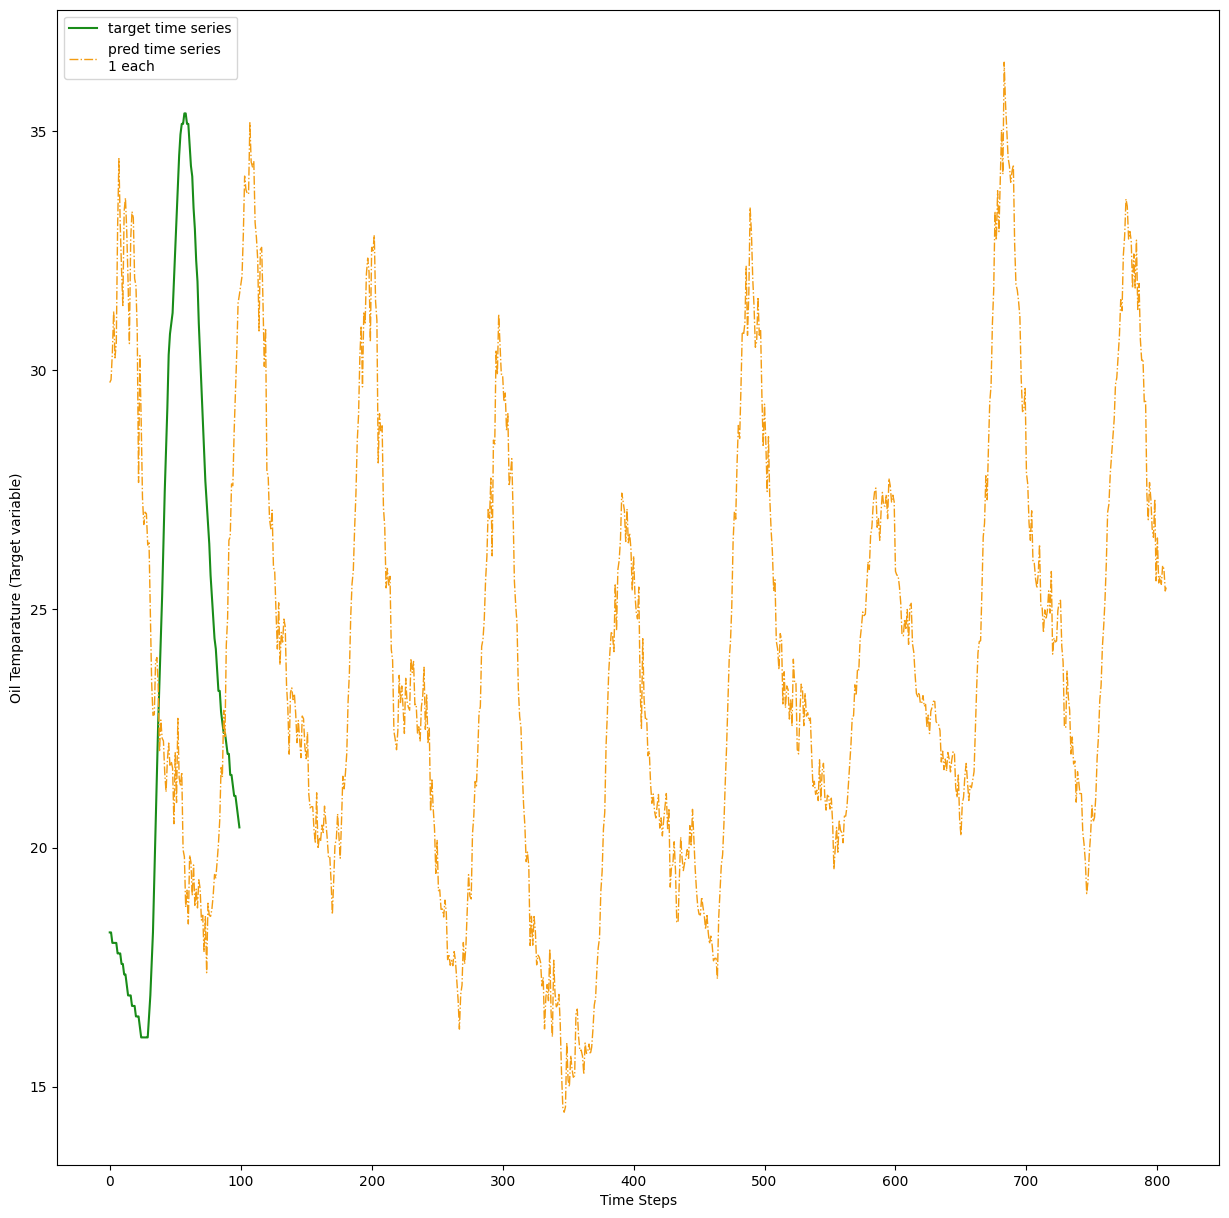

In [8]:
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, target_list =test_df.OT.tolist()[0:number_of_forecasts],  neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)

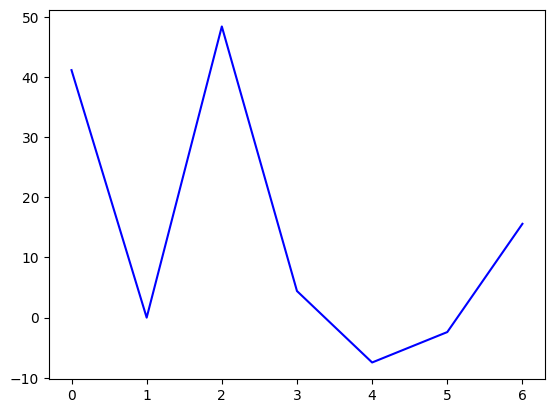

In [6]:
import matplotlib.pyplot as plt
neti = net.eval()
for i, (inputs, targets) in enumerate(test_data): 
    if i == 400: 
        break
    else: 
        output = neti(inputs)

plt.plot(output[1,:].tolist(), 'g')
plt.plot(targets[1,0,:].tolist(), 'b')

#### Dlinear

In [7]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'dlinear'
            )

test_data = DataLoader(TimeSeriesDataset(test_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)

NameError: name 'val_df' is not defined

#### RLMP

Random seed set as 42
RMLP activated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 34.15103763961792
Current (running) training loss at iteration 10000 : 26.215125174427033
Current (running) training loss at iteration 15000 : 20.059809621302286
Current (running) training loss at iteration 20000 : 16.20290729264021
Current (running) training loss at iteration 25000 : 14.707261218910217
Current (running) training loss at iteration 30000 : 13.692369370698929

Epoch 0: 

Train metrics: -------
Running (training) loss is 12.882676473059057.
Training MAE is 0.9050180617034954.
Training MSE is 12.951467582087405.
Training MAPE is 60587659.24700862.

Val metrics: -------
Running (validation) loss is 7.078883362597772.
Validation MAE is 0.7104712083536874.
Validation MSE is 7.143642597744215.
Validation MAPE is 0.021140445516283024.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 3.695407676792145
Current (running) training loss at i

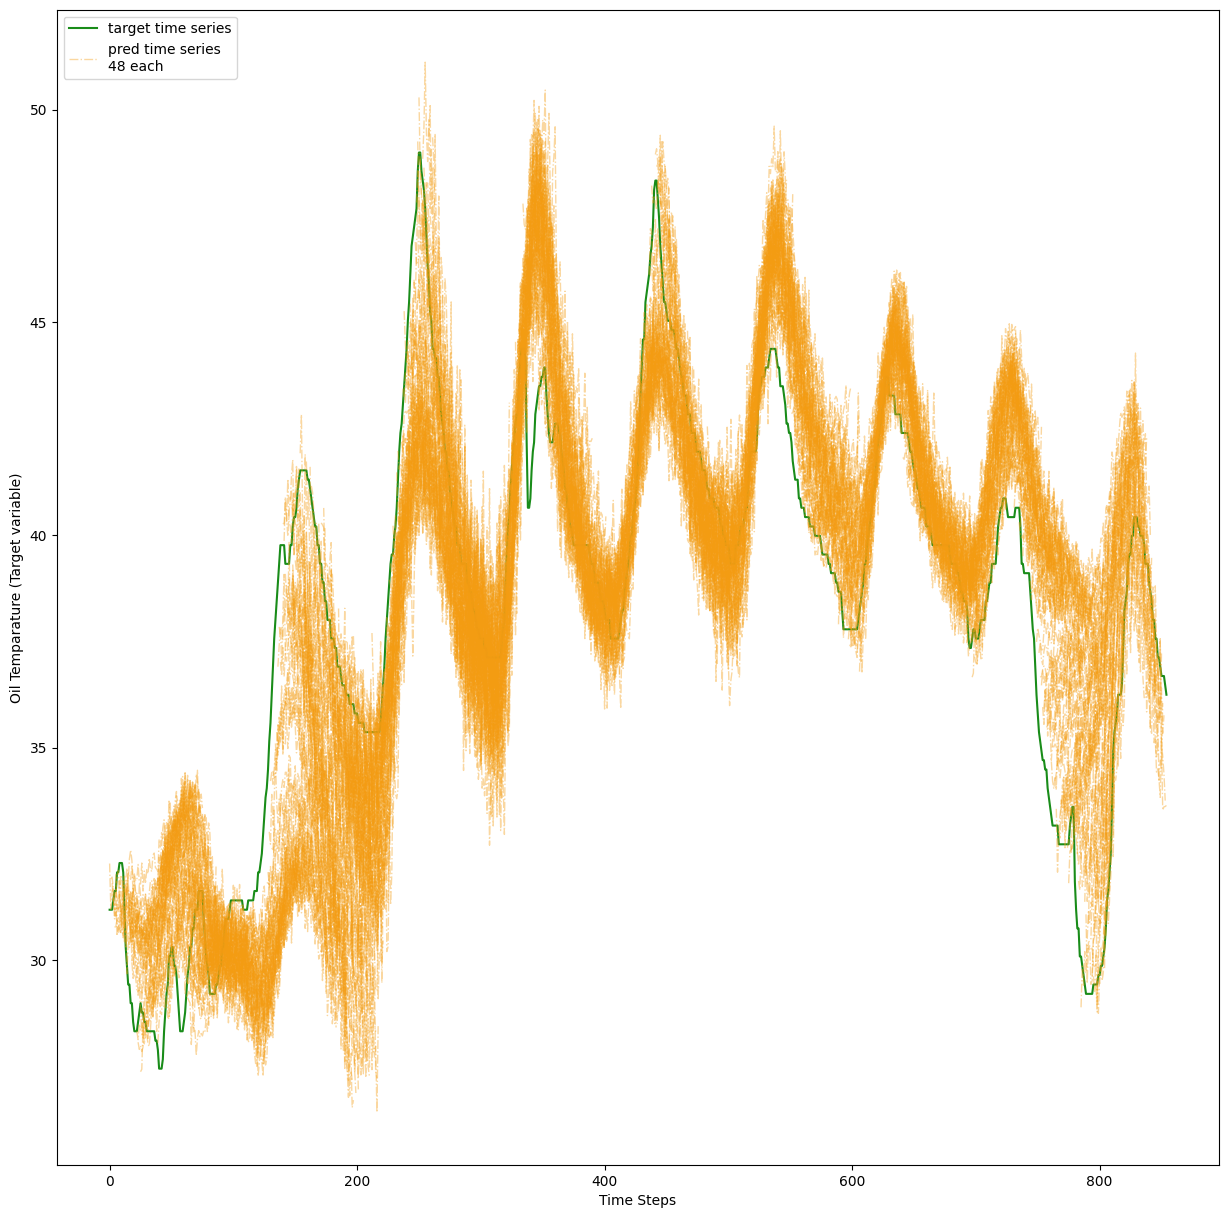

In [ ]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'rmlp'
            )

test_data = DataLoader(TimeSeriesDataset(test_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)